In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [34]:
# df = pd.read_excel("combinedData.xlsx")
df = pd.read_csv('rawData.csv')

In [35]:
df.head()

,Location,KillCount,Position,Mode
0,D4,0,30,SOLO
1,C7,1,60,SOLO
2,D7,0,14,SOLO
3,G6,1,17,SOLO
4,D6,0,43,DUO


In [36]:
df.isnull().any()

Location     False
KillCount    False
Position     False
Mode         False
dtype: bool

In [38]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [40]:
df=df.drop([20])

In [41]:
df

,Location,KillCount,Position,Mode
0,D4,0,30,0
1,C7,1,60,0
2,D7,0,14,0
3,G6,1,17,0
4,D6,0,43,1
5,G6,0,28,1
6,G8,1,35,1
7,F5,0,50,1
8,H6,1,47,1
9,A5,0,49,1


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(-1, 10)

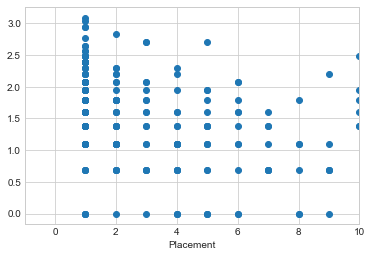

In [53]:
import seaborn as sns

plt.scatter((df.iloc[:,2]),np.log(df.iloc[:,1]))
# plt.ylabel()
plt.xlabel("Placement")
plt.xlim(-1,10)



Text(0.5,0,'Placement')

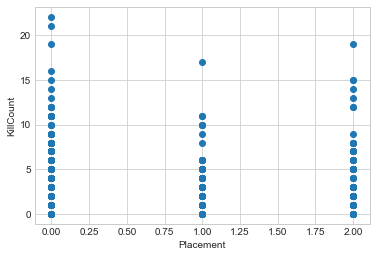

In [54]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Placement")

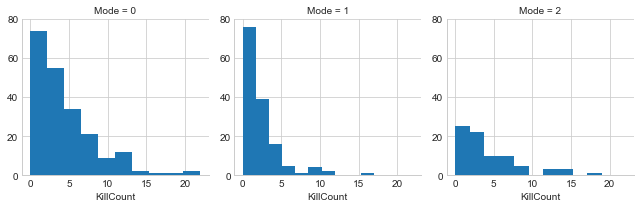

In [55]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

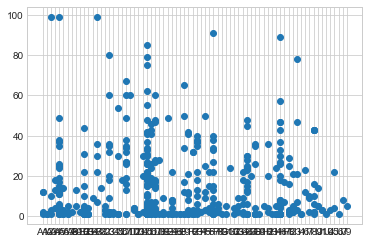

In [56]:
plt.scatter( df["Location"],df["Position"])

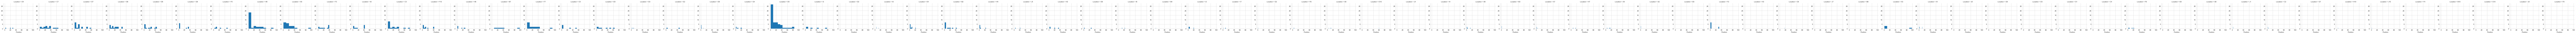

In [57]:
multiples = sns.FacetGrid(df, col = "Location")
multiples = multiples.map(plt.hist, "Position")

In [58]:
import statsmodels.api as sm

Y = df["Position"]
X = df[["KillCount", "Mode"]]

model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Position   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     51.68
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           7.52e-21
Time:                        15:52:05   Log-Likelihood:                -1956.6
No. Observations:                 434   AIC:                             3917.
Df Residuals:                     432   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount     -0.0840      0.223     -0.377      0.7

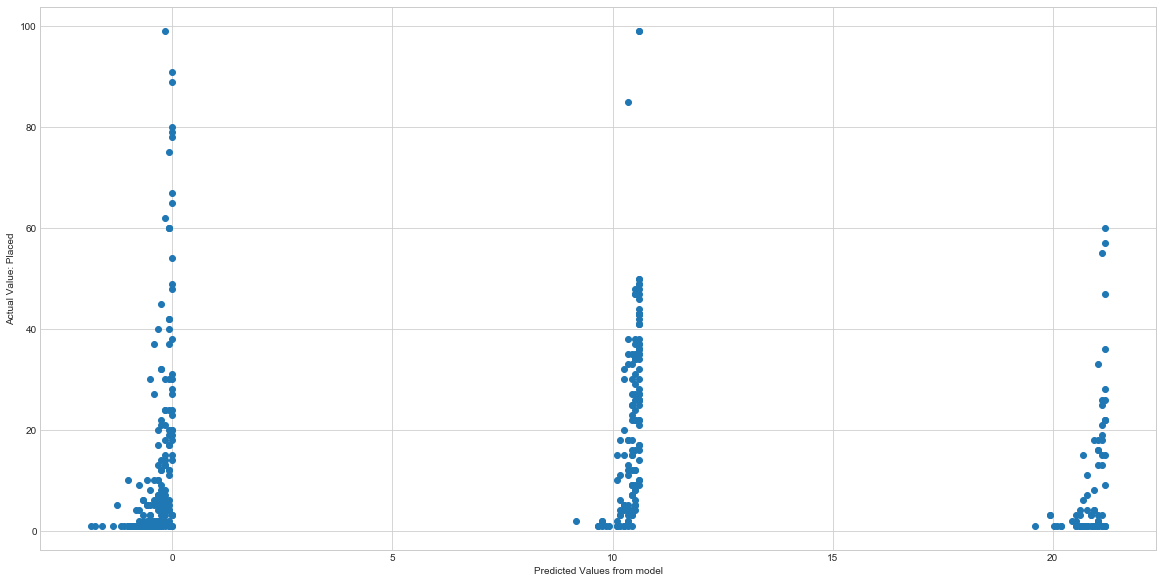

In [59]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Placed")
plt.show()

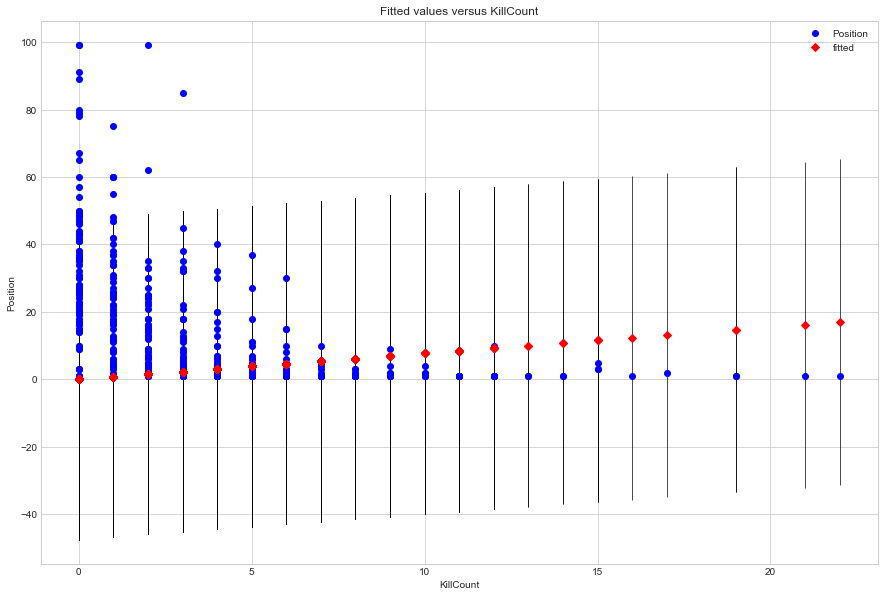

In [60]:
X = df["KillCount"]
Y = df["Position"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [29]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

In [30]:
from sklearn.linear_model import LinearRegression

In [33]:
Y_train.shape

(331,)

In [31]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[  3   0   7   3   5   0   6   7   1   0   0   5   1  12   0   6   0   6
   0   0   8   0   6   6   1   2   8   1   1   4   0   2   2   3   0   1
   0   5   0   1   2   3   1   0   4  10   3   3   2   4   4  11   9  12
   0   0   2   5   2   5   2   0   2   2   1   5   0   8   1   3   0   1
   0   1   0   3   0   1   0   1   5   6   8   1   0   0   0   2   2   2
   5   3  11  12   1   4   5   2   9  19   2   4  11   5   2   5   1   0
  13   9   0   3   8   1   1  11   7   0   4   4   7   1   5   4   6   6
   4  12   3   9   4   6   3   1  29   4   2  18   2   0   8   0   5 100
   2   3   3   3   3   1   4   1   5   2   3  13   4   2   0   5   3   1
   0   2   0   3   3   9   5   0   6   3   5   6   2   5   2   1   2   3
   3   4   1  10   0   2   1   3   4   1   9   2   5  14   0   0   3   3
   1   0   2  19   6   3   1   4   1  16   2   1   1   6   6   0  15   1
   2   0   6   0   5   0   7   1   9   2   9   3   0   5   3   2   1   2
   2   4   0   8   6   1   4   3   3   8   6   0   1   5  12   8   2   7
   7   3   4   0   3   2   2  11   0   4   1   0   1   4   1   0   0   3
   8   0   2   6   5   1  10   5   0  11   5  17  12   0   0   3   0   0
   5   4   5  11   7   0   2   2   0   4   0 100   4   4   8   3  15   3
   0   6   3   0   3   3   0   3   1   1   2   7   0   3  22   1   0   2
   1   4   7  26   2   2  11].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.